In [4]:
# Imports
import itertools #Outputs of CNN
import matplotlib.pyplot as plt
import tensorflow
import cv2
import numpy as np
from tensorflow.keras.models import load_model,Sequential

In [6]:
# Load up the existing trained model 
model = load_model('imageclassifier.h5')

In [7]:
# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [9]:
model.layers

In [10]:
model.layers[0]

In [13]:
model.get_layer('conv2d')

In [17]:
# Trained Intermediate Layers
intermed_layers=model.layers[:3]
intermed_layers

In [18]:
# The intemrediate modle with Trained existing layers
intermed_model=Sequential(intermed_layers)

In [19]:
intermed_model

In [20]:
intermed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [22]:
 # Determine required input shape
intermed_model.input_shape

(None, 256, 256, 3)

In [24]:
# Load the image 
image = cv2.imread('sadtest.jpg')
resize = cv2.resize(image, (256,256))

In [25]:
resize.shape

(256, 256, 3)

In [26]:
# Make a prediction 
yhat = intermed_model.predict(np.expand_dims(resize,0))

In [27]:
yhat

array([[[[  1.1777928 ,   0.        ,  46.3238    , ...,   7.539171  ,
            6.4839    , 110.80011   ],
         [  1.0005511 ,   0.        ,  48.39893   , ...,   7.7572885 ,
            5.3422337 , 114.692795  ],
         [  0.        ,   0.        ,  49.71846   , ...,   8.565583  ,
            4.8837066 , 116.06402   ],
         ...,
         [  0.        ,   0.        ,  57.512447  , ...,  11.333077  ,
            2.1405835 , 126.64882   ],
         [  0.        ,   0.        ,  56.726677  , ...,  11.495927  ,
            1.9476644 , 125.380905  ],
         [  0.        ,   0.        ,  56.218647  , ...,  12.339799  ,
            1.8240837 , 123.27918   ]],

        [[  1.9792719 ,   0.        ,  47.701782  , ...,   6.8506117 ,
            5.576826  , 113.081894  ],
         [  0.90827465,   0.        ,  49.988335  , ...,   6.015356  ,
            5.616679  , 115.453995  ],
         [  0.        ,   0.        ,  50.982082  , ...,   6.620649  ,
            4.9311976 , 117.35406

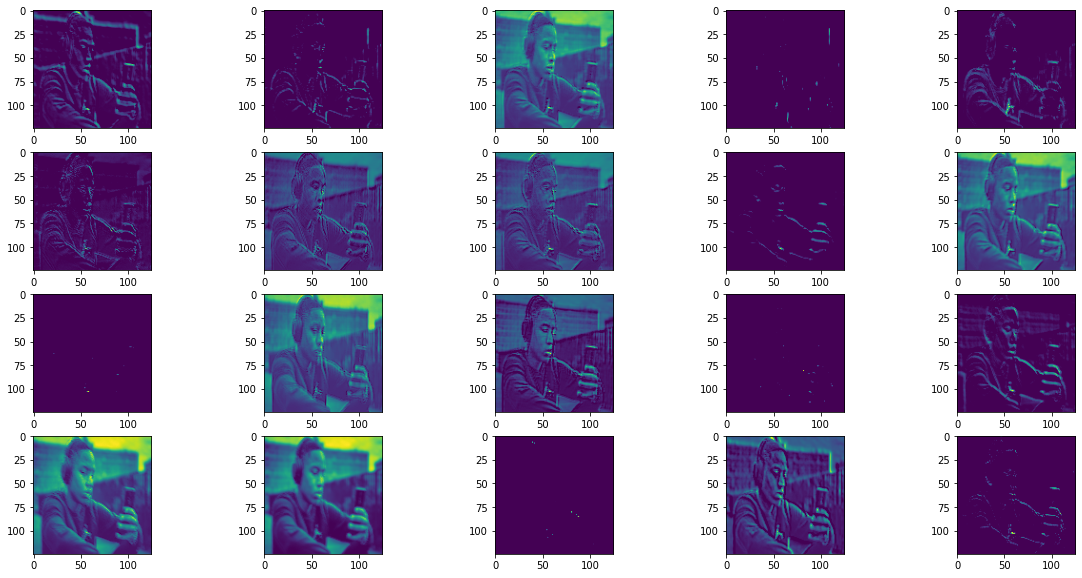

In [29]:
# Viz Grid
num_rows = 4
num_cols = 5 

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_rows), range(num_cols)))):
    ax[ax_idx[0], ax_idx[1]].imshow(yhat[0,:,:,idx])